In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def list_files(ext=".csv"):
    files = os.listdir('.')
    print("Files in the current directory:")
    for file in files:
        if file.endswith(ext):
            print(file)

def load_dfs(files):
    dfs = {}
    for file in files:
        if file.endswith('.csv'):
            df = pd.read_csv(file, index_col=0)
            dfs["".join("".join(file.split("_")[-2:]).split(".")[0:-1])] = df

    dfs = pd.concat(dfs, axis=1, keys=dfs.keys())
    return dfs

dfs = load_dfs(os.listdir('.'))

/tmp/ipykernel_3227970/178015893.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(keys))


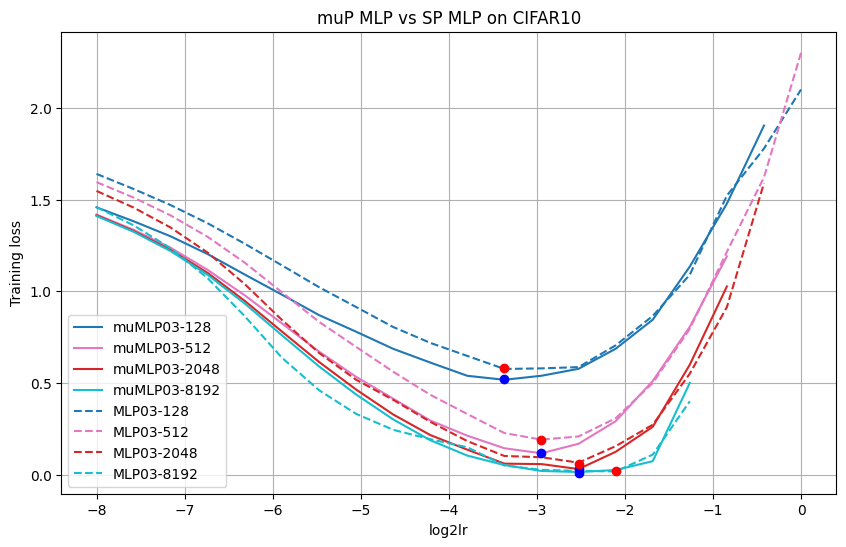

In [68]:
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(10, 6))

keys = sorted(set(col[1] for col in dfs.columns))
cmap = cm.get_cmap('tab10', len(keys))
color_map = {key: cmap(i) for i, key in enumerate(keys)}

# Step 2: Plot with shared color but different linestyles
for col in dfs.columns:
    key = col[1]
    color = color_map[key]
    linestyle = '-' if 'mu' in col[0] else '--'
    label = f"{col[0]}-{col[1]}"
    dfs[col].plot(ax=ax, label=label, linestyle=linestyle, color=color)

ax.legend()
for col in dfs.columns:
    # find minimum and mark
    min_idx = dfs[col].idxmin()
    min_val = round(dfs[col].min(), 2)
    if "mu" in col[0]:
        # plt.annotate(f"{' '.join(col)}:{min_val}", xy=(min_idx, min_val), xytext=(min_idx+0.1, min_val + 0.1),
        #             arrowprops=dict(facecolor='blue', shrink=0.01, width=1, headwidth=4, alpha=0.5))
        plt.plot(min_idx, min_val, 'o', color='blue')
    else:
        # plt.annotate(f"{' '.join(col)}:{min_val}", xy=(min_idx, min_val), xytext=(min_idx+0.1, min_val + 0.1),
        #             arrowprops=dict(facecolor='red', shrink=0.01, width=1, headwidth=4, alpha=0.5))
        plt.plot(min_idx, min_val, 'o', color='red')

plt.title("muP MLP vs SP MLP on CIFAR10")
plt.xlabel("log2lr")
plt.ylabel("Training loss")
plt.grid()
plt.savefig("mlp_cifar10.png", dpi=300)
plt.show()